In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('HAR_cleaned.csv')
df.head()

,subjectID,timestamp,heartrate,IMUH_temp,IMUH_acc1,IMUH_acc2,IMUH_acc3,IMUH_gyr1,IMUH_gyr2,IMUH_gyr3,IMUH_mag1,IMUH_mag2,IMUH_mag3,IMUC_temp,IMUC_acc1,IMUC_acc2,IMUC_acc3,IMUC_gyr1,IMUC_gyr2,IMUC_gyr3,IMUC_mag1,IMUC_mag2,IMUC_mag3,IMUA_temp,IMUA_acc1,IMUA_acc2,IMUA_acc3,IMUA_gyr1,IMUA_gyr2,IMUA_gyr3,IMUA_mag1,IMUA_mag2,IMUA_mag3,activityID
0,101,37.66,NaN,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,101,37.67,NaN,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,101,37.68,NaN,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,101,37.69,NaN,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,101,37.70,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [3]:
df1 = df.copy()

In [4]:
df1.columns

Index(['subjectID', 'timestamp', 'heartrate', 'IMUH_temp', 'IMUH_acc1',
       'IMUH_acc2', 'IMUH_acc3', 'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3',
       'IMUH_mag1', 'IMUH_mag2', 'IMUH_mag3', 'IMUC_temp', 'IMUC_acc1',
       'IMUC_acc2', 'IMUC_acc3', 'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3',
       'IMUC_mag1', 'IMUC_mag2', 'IMUC_mag3', 'IMUA_temp', 'IMUA_acc1',
       'IMUA_acc2', 'IMUA_acc3', 'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3',
       'IMUA_mag1', 'IMUA_mag2', 'IMUA_mag3', 'activityID'],
      dtype='object')

#### Target variable distribution

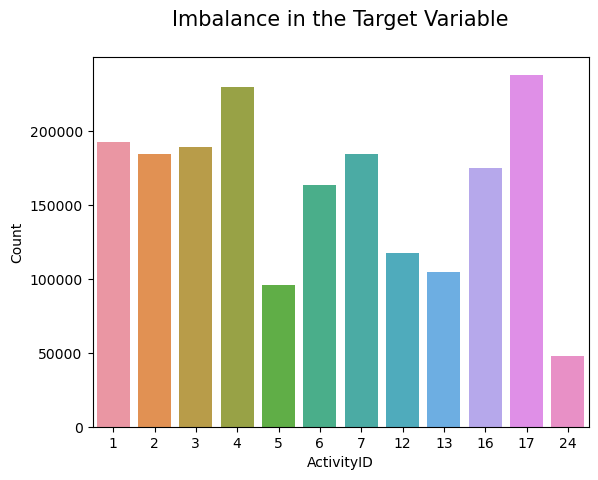

In [5]:
aid = sns.countplot(x = df1['activityID'])

plt.title('Imbalance in the Target Variable\n',fontsize=15)
plt.xlabel('ActivityID',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()

#### Numerical features

In [6]:
continuous = ['timestamp', 'IMUH_temp', 'IMUH_acc1', 'IMUH_acc2',
       'IMUH_acc3', 'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3', 'IMUH_mag1',
       'IMUH_mag2', 'IMUH_mag3', 'IMUC_temp', 'IMUC_acc1', 'IMUC_acc2',
       'IMUC_acc3', 'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3', 'IMUC_mag1',
       'IMUC_mag2', 'IMUC_mag3', 'IMUA_temp', 'IMUA_acc1', 'IMUA_acc2',
       'IMUA_acc3', 'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3', 'IMUA_mag1',
       'IMUA_mag2', 'IMUA_mag3',] # all the otehr features are encoded categorical features, not continuous

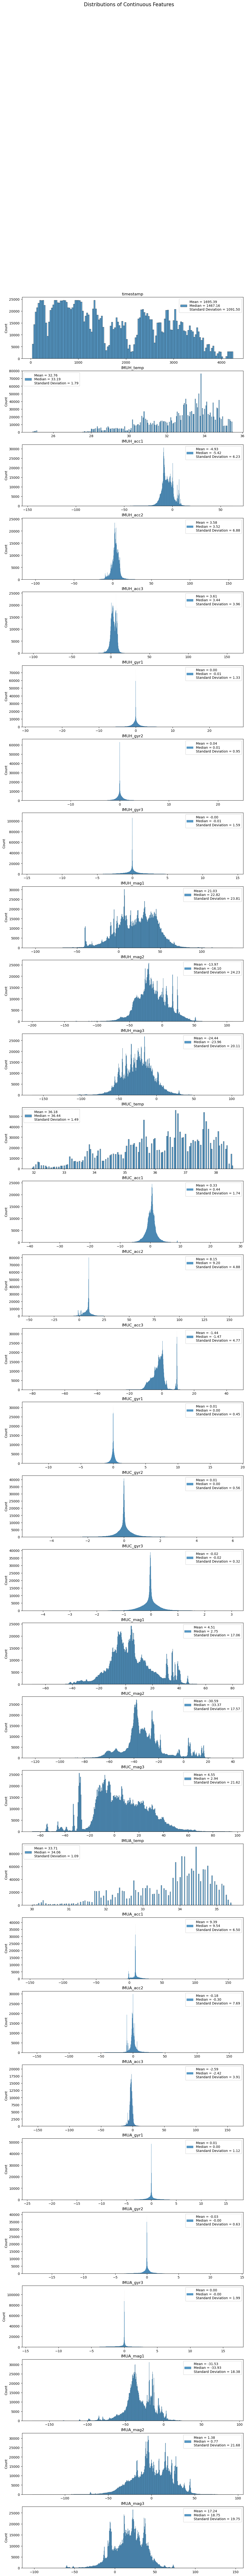

In [7]:
def plot_num_features(df, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(12, 4 * len(columns)))
    fig.suptitle("Distributions of Continuous Features", fontsize=15)

    for i, col in enumerate(columns):
        label = 'Mean = {}\nMedian = {}\nStandard Deviation = {}'.format(
            "{:.2f}".format(df[col].mean()),
            "{:.2f}".format(df[col].median()),
            "{:.2f}".format(df[col].std())
        )
        sns.histplot(x=df[col], ax=axes[i], label=label).legend(loc='best', fontsize=10)
        axes[i].set_title(f"{col}")
        axes[i].set_xlabel(None)

    plt.show()

plot_num_features(df1, continuous)

,subjectID,timestamp,heartrate,IMUH_temp,IMUH_acc1,IMUH_acc2,IMUH_acc3,IMUH_gyr1,IMUH_gyr2,IMUH_gyr3,IMUH_mag1,IMUH_mag2,IMUH_mag3,IMUC_temp,IMUC_acc1,IMUC_acc2,IMUC_acc3,IMUC_gyr1,IMUC_gyr2,IMUC_gyr3,IMUC_mag1,IMUC_mag2,IMUC_mag3,IMUA_temp,IMUA_acc1,IMUA_acc2,IMUA_acc3,IMUA_gyr1,IMUA_gyr2,IMUA_gyr3,IMUA_mag1,IMUA_mag2,IMUA_mag3,activityID
subjectID,1.000000,-0.020847,-0.128235,0.152233,-0.031432,-0.281280,-0.002459,-0.026349,0.004554,-0.001736,0.051553,0.307573,0.032178,0.249664,0.054745,0.054829,0.159311,-0.001236,0.014292,-0.011368,0.046822,0.084246,-0.094507,-0.215046,0.003193,-0.013328,-0.143095,0.017007,-0.007324,-0.002726,0.192958,0.104856,0.045824,-0.000805
timestamp,-0.020847,1.000000,0.781018,-0.490635,-0.324483,0.038811,-0.213915,0.010400,0.047977,0.002557,0.336977,-0.096594,0.081725,-0.079121,-0.029618,0.159868,-0.470594,0.005246,0.025654,-0.020299,-0.189765,-0.368993,0.501113,-0.119171,0.326682,0.201005,0.005451,0.000230,-0.041741,-0.003094,-0.308009,-0.237450,-0.042064,0.144370
heartrate,-0.128235,0.781018,1.000000,-0.392719,-0.304767,0.061473,-0.268230,0.013709,0.063663,-0.002162,0.323093,-0.136681,0.104108,-0.121405,-0.017360,0.158603,-0.410932,0.008466,0.015662,-0.023344,-0.157423,-0.404140,0.451494,-0.057182,0.277960,0.198062,-0.005200,0.000925,-0.022244,0.005877,-0.325040,-0.249641,-0.057358,0.266168
IMUH_temp,0.152233,-0.490635,-0.392719,1.000000,0.059387,-0.052576,0.075700,-0.025175,-0.024124,-0.001393,-0.094835,-0.024711,-0.019605,0.757001,0.006029,0.034330,0.096013,-0.002041,-0.014133,0.007087,-0.044802,-0.002896,-0.179027,0.496267,-0.060704,-0.045060,-0.040735,0.001185,0.030173,0.003408,0.091216,0.113318,0.155197,0.162190
IMUH_acc1,-0.031432,-0.324483,-0.304767,0.059387,1.000000,-0.085183,0.259931,0.019544,-0.093045,0.031129,-0.510324,0.057741,-0.211443,-0.160242,0.020916,-0.424169,0.438898,-0.071162,-0.047170,0.078704,0.250758,0.342420,-0.346107,-0.134785,-0.287963,-0.094532,-0.010946,0.038478,-0.071584,0.093447,0.084834,0.209678,-0.043391,-0.134185
IMUH_acc2,-0.281280,0.038811,0.061473,-0.052576,-0.085183,1.000000,-0.066392,0.181293,-0.007991,0.017908,-0.043977,-0.431811,0.103932,-0.054577,0.038381,0.228767,-0.119716,0.059930,0.001847,0.033872,-0.051837,-0.089075,0.055583,0.073368,0.048910,0.111941,0.008020,-0.004938,-0.031040,-0.037362,-0.048738,-0.095760,0.041019,0.038809
IMUH_acc3,-0.002459,-0.213915,-0.268230,0.075700,0.259931,-0.066392,1.000000,-0.027289,-0.024525,-0.084018,-0.193247,0.145643,-0.507119,-0.032468,-0.103062,-0.069866,0.144280,0.007890,-0.059291,0.031994,0.176034,0.199390,-0.137666,-0.025934,-0.160071,-0.069817,0.019989,0.013492,-0.012994,0.025275,0.059817,0.108525,-0.011612,-0.117234
IMUH_gyr1,-0.026349,0.010400,0.013709,-0.025175,0.019544,0.181293,-0.027289,1.000000,-0.221345,-0.239397,-0.000029,-0.021727,0.011023,-0.026796,-0.087289,0.022841,0.005191,0.013386,-0.253109,0.186440,-0.009360,-0.003428,0.001849,-0.005112,0.018091,0.011670,-0.011393,0.025796,-0.033879,0.134349,0.013241,-0.065386,-0.000664,0.019300
IMUH_gyr2,0.004554,0.047977,0.063663,-0.024124,-0.093045,-0.007991,-0.024525,-0.221345,1.000000,0.084921,-0.055096,-0.010877,0.002576,-0.030531,0.055887,0.039642,-0.018729,0.047494,0.262100,-0.147777,-0.011545,-0.027266,0.005970,-0.021718,0.052918,0.005364,-0.031178,0.050544,0.097022,-0.033152,-0.007776,-0.002912,-0.014874,0.027241
IMUH_gyr3,-0.001736,0.002557,-0.002162,-0.001393,0.031129,0.017908,-0.084018,-0.239397,0.084921,1.000000,-0.011546,-0.022053,0.004756,-0.002198,0.175124,-0.062952,0.015508,-0.097393,0.350478,-0.192771,-0.023264,0.002279,0.007202,-0.005595,-0.022645,0.052656,0.036166,-0.046746,-0.018229,-0.163790,-0.062788,0.128271,0.035899,0.000665


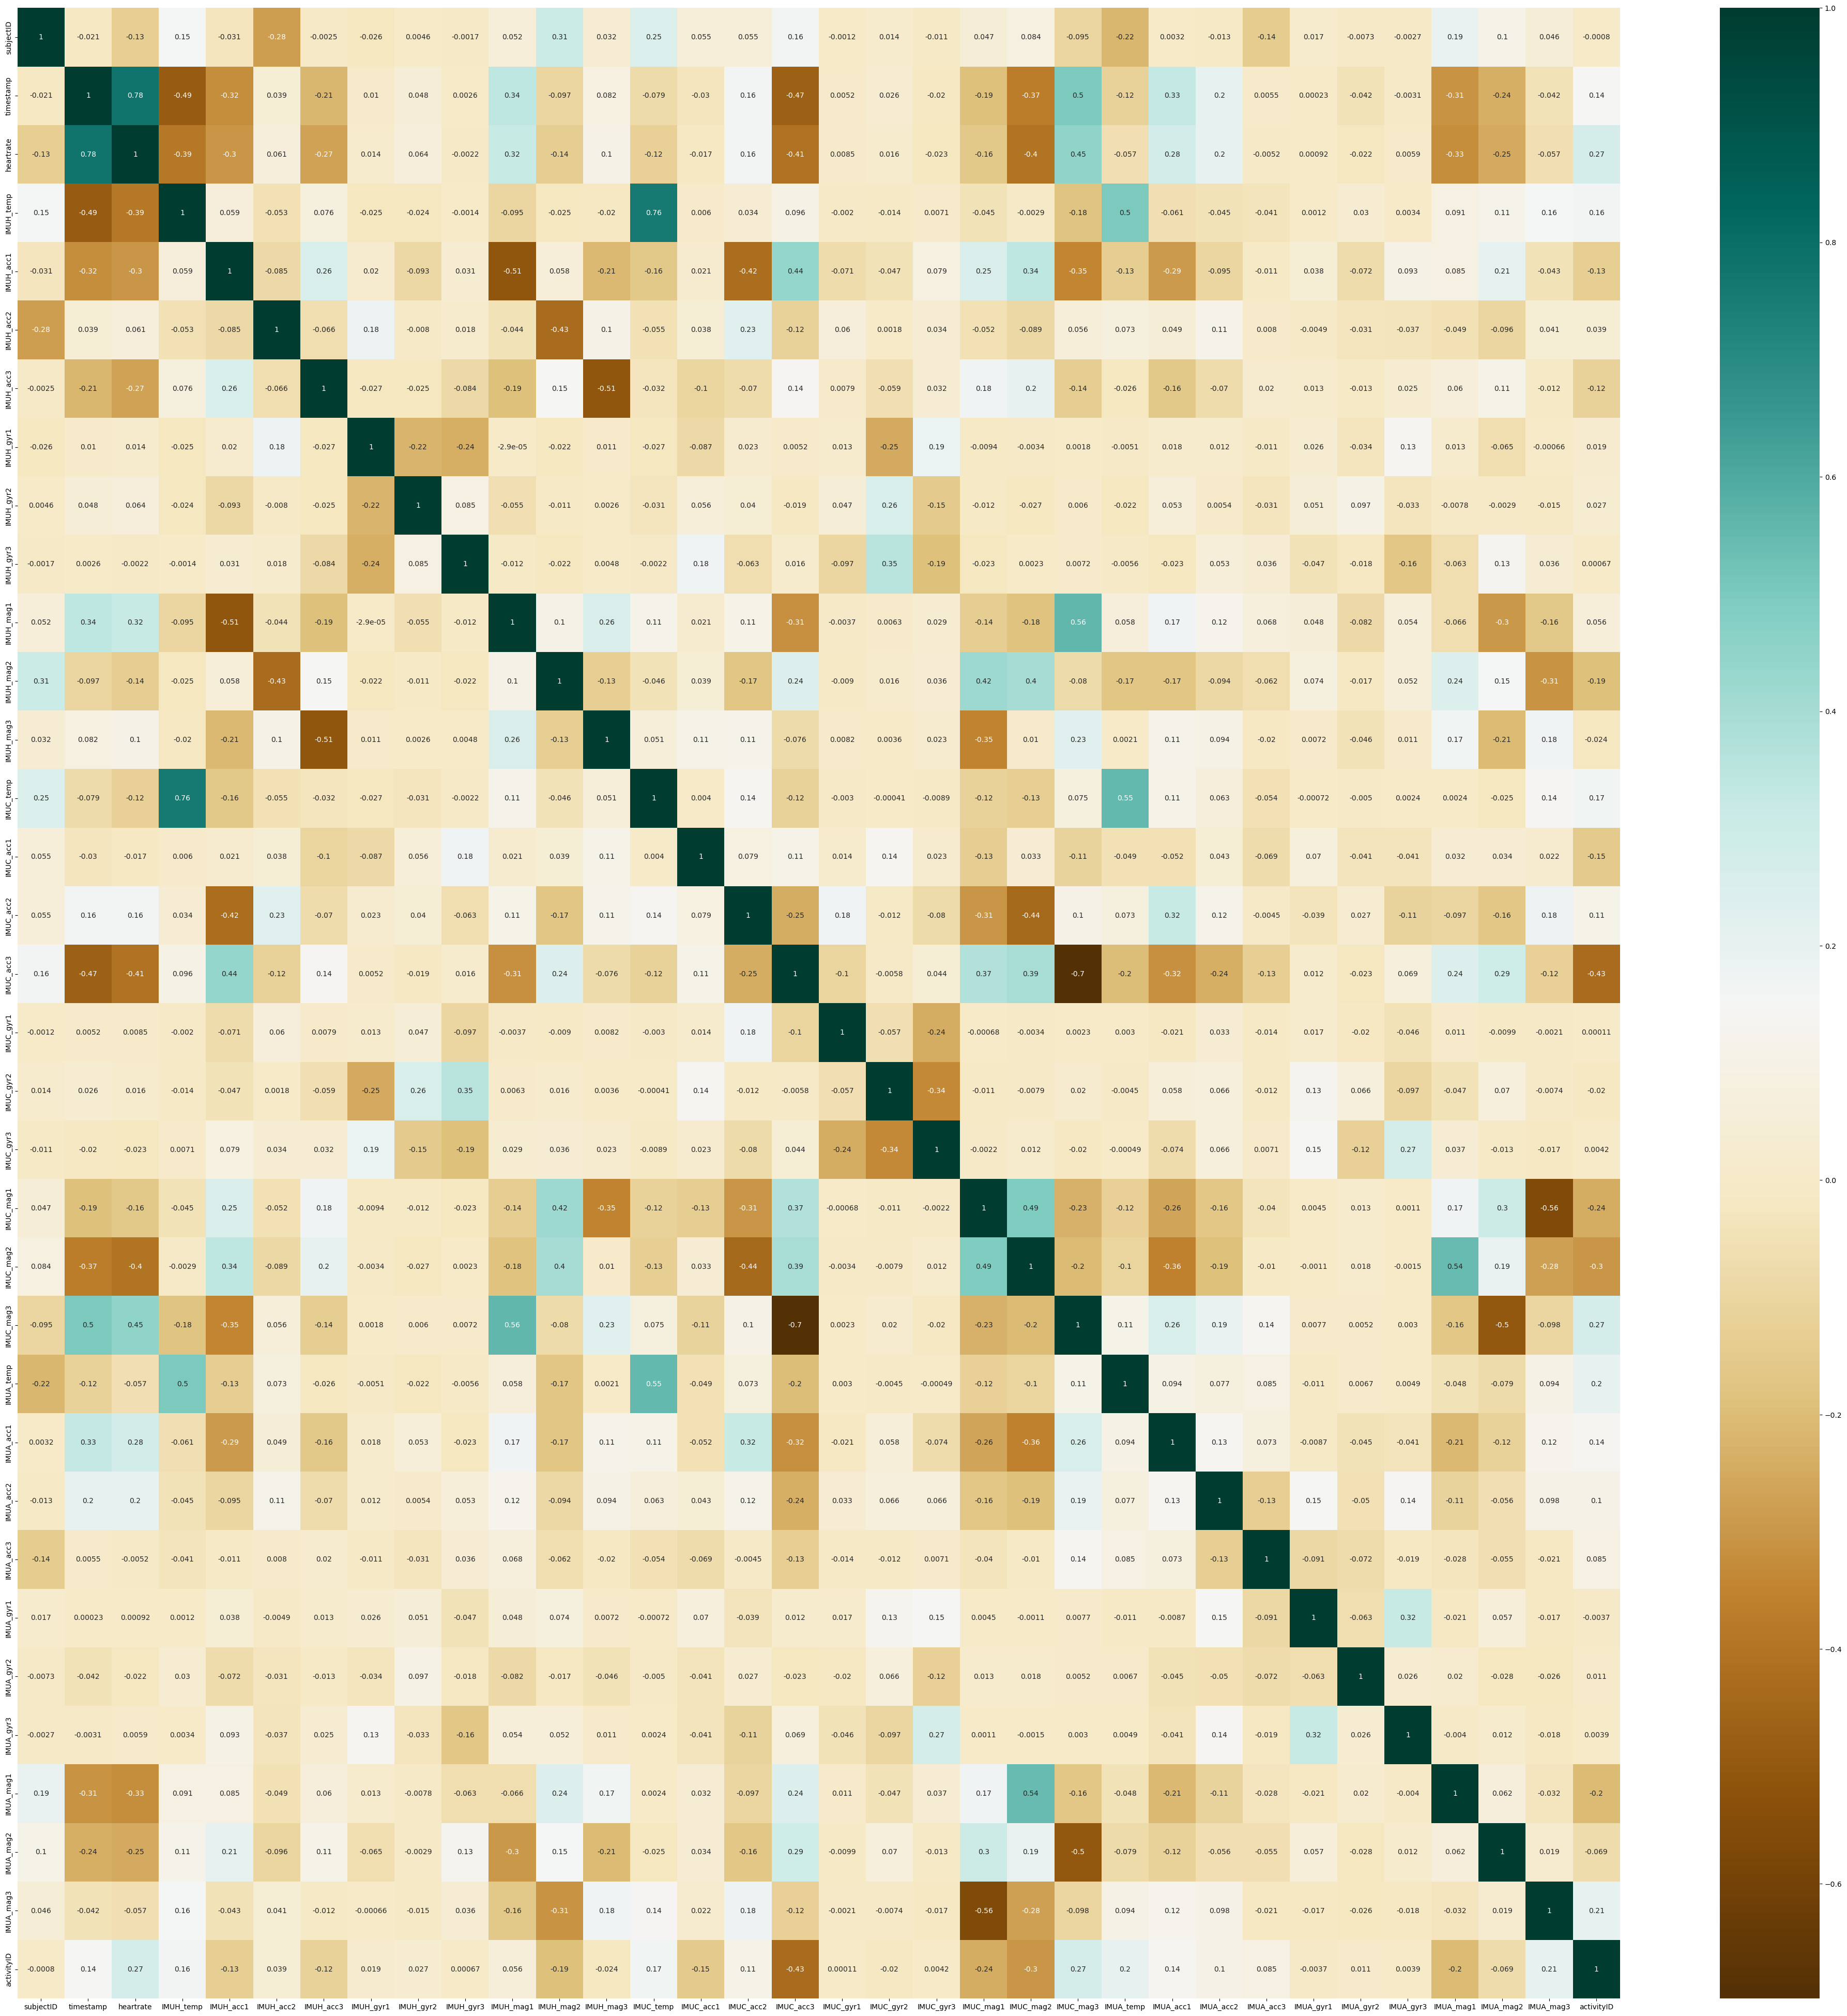

In [9]:
plt.figure(figsize=(50,50))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [11]:
# more significant features to target variable

target_variable = 'activityID'  
correlation_threshold = 0.05
c = df1.corr()
selected_features = c.index[c[target_variable].abs() < correlation_threshold].tolist()
print("Selected Feature Names:")
print(selected_features)

Selected Feature Names:
['subjectID', 'IMUH_acc2', 'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3', 'IMUH_mag3', 'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3', 'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3']
